# PROJECT: BIKE DATA


In [1]:
import statsmodels.formula.api as sm
import statsmodels.tools.eval_measures as sme
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
import imageio


In [2]:
df1 = pd.read_csv('../data/dc_bikes.csv')


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       17379 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 1.6+ MB


In [4]:
df2 = pd.read_csv('../data/dc_bikes.csv', parse_dates=['datetime'], index_col=0)


In [5]:
df2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   windspeed   17379 non-null  float64
 8   casual      10886 non-null  float64
 9   registered  10886 non-null  float64
 10  count       17379 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.6 MB


In [7]:
#Extract features like hour, month, etc. from the datetime column into their own columns

df2['hour'] = df2.index.hour

In [8]:
df2['weekday'] = df2.index.day_name()

In [9]:
df2['day'] = df2.index.day

In [10]:
df2['month'] = df2.index.month

In [11]:
df2['year'] = df2.index.year

In [12]:
df2.head(15)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,day,month,year
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,Saturday,1,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,Saturday,1,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,Saturday,1,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,Saturday,1,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,Saturday,1,1,2011
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.0,1.0,1,5,Saturday,1,1,2011
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2.0,0.0,2,6,Saturday,1,1,2011
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1.0,2.0,3,7,Saturday,1,1,2011
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1.0,7.0,8,8,Saturday,1,1,2011


In [13]:
df2.drop_duplicates(keep='first')              

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,day,month,year
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,Saturday,1,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,Saturday,1,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,Saturday,1,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,Saturday,1,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,Saturday,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,Monday,31,12,2012
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,Monday,31,12,2012
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,Monday,31,12,2012


In [14]:
df2['temp'] = df2['temp'].round()


In [15]:
df2['atemp'] = df2['atemp'].round()


In [16]:
#df2['temp'] = df2['temp'].astype('Int64')


In [17]:
#df2['atemp'] = df2['atemp'].astype('Int64')


In [18]:
df2.isna().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count            0
hour             0
weekday          0
day              0
month            0
year             0
dtype: int64

In [19]:
df2['casual']=df2['casual'].fillna('--')


In [20]:
df2['registered']=df2['registered'].fillna('--')


In [21]:
df2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,day,month,year
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,10.0,14.0,81,0.0,3.0,13.0,16,0,Saturday,1,1,2011
2011-01-01 01:00:00,1,0,0,1,9.0,14.0,80,0.0,8.0,32.0,40,1,Saturday,1,1,2011
2011-01-01 02:00:00,1,0,0,1,9.0,14.0,80,0.0,5.0,27.0,32,2,Saturday,1,1,2011
2011-01-01 03:00:00,1,0,0,1,10.0,14.0,75,0.0,3.0,10.0,13,3,Saturday,1,1,2011
2011-01-01 04:00:00,1,0,0,1,10.0,14.0,75,0.0,0.0,1.0,1,4,Saturday,1,1,2011


In [22]:
#Plot small sections of the count data over time (1 day, 1 week, etc.)


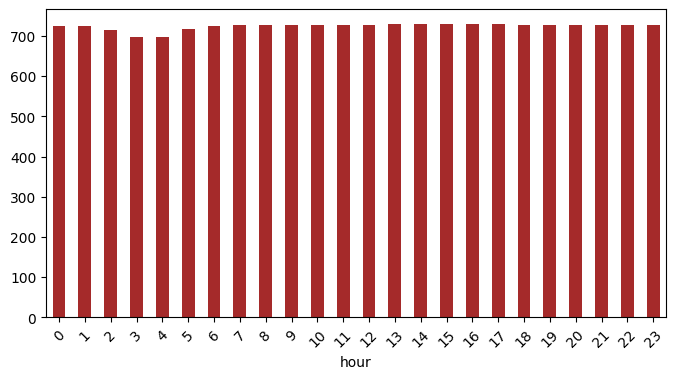

In [23]:
plt.figure(figsize=(8, 4))
df2.groupby('hour')['count'].count().plot.bar(color = ['brown'])
plt.xticks(rotation=45);

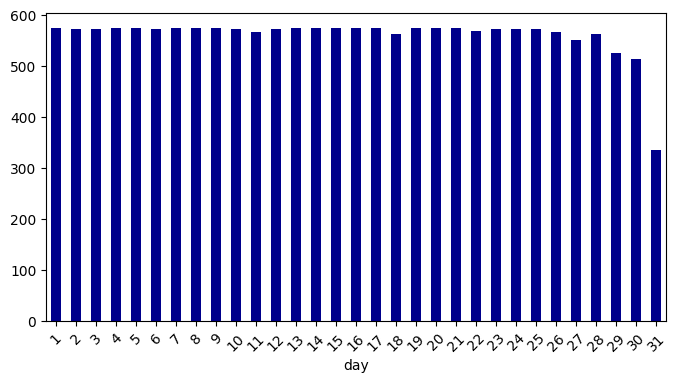

In [24]:
plt.figure(figsize=(8, 4))
df2.groupby('day')['count'].count().plot.bar(color = ['darkblue'])
plt.xticks(rotation=45);

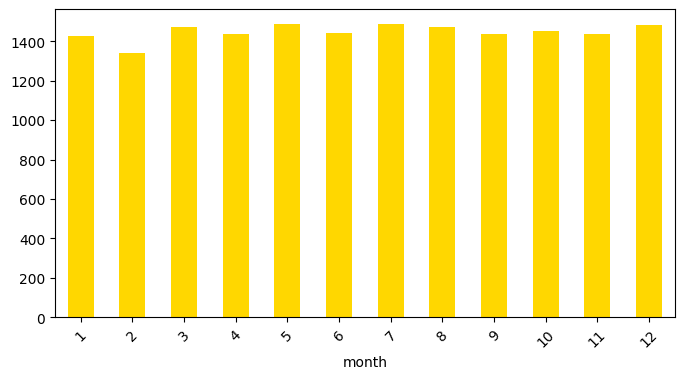

In [25]:
plt.figure(figsize=(8, 4))
df2.groupby('month')['count'].count().plot.bar(color = ['gold'])
plt.xticks(rotation=45);

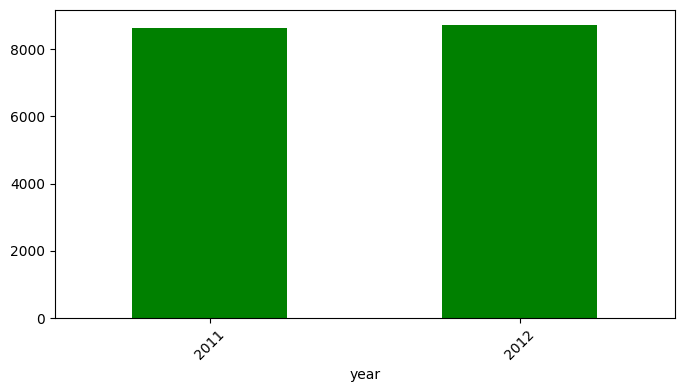

In [26]:
plt.figure(figsize=(8, 4))
df2.groupby('year')['count'].count().plot.bar(color = ['green'])
plt.xticks(rotation=45);

In [27]:
#Create a part_of_day column for the bike data. It should have the following labels: morning, afternoon, evening, night
df2['hour'].min(), df2['hour'].max()

(0, 23)

In [28]:
labels_bin = ['morning' , 'afternoon' , 'evening' , 'night']

In [29]:
bin_boundaries = [0,6,12,18,23]

In [30]:
pd.cut(df2['hour'], bins=bin_boundaries,labels=labels_bin, include_lowest=True )

datetime
2011-01-01 00:00:00    morning
2011-01-01 01:00:00    morning
2011-01-01 02:00:00    morning
2011-01-01 03:00:00    morning
2011-01-01 04:00:00    morning
                        ...   
2012-12-31 19:00:00      night
2012-12-31 20:00:00      night
2012-12-31 21:00:00      night
2012-12-31 22:00:00      night
2012-12-31 23:00:00      night
Name: hour, Length: 17379, dtype: category
Categories (4, object): ['morning' < 'afternoon' < 'evening' < 'night']

In [31]:
df2['part_of_day'] = pd.cut(df2['hour'], bins=bin_boundaries,labels=labels_bin, include_lowest=True )

In [32]:
df2.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,,,
2011-08-10 06:00:00,3,0,1,1,28.0,32.0,61,0.0000,9.0,110.0,119,6,Wednesday,10,8,2011,morning
2012-06-15 04:00:00,2,0,1,1,23.0,27.0,83,11.0014,1.0,13.0,14,4,Friday,15,6,2012,morning
2012-09-27 03:00:00,4,0,1,1,25.0,29.0,78,0.0000,--,--,11,3,Thursday,27,9,2012,morning
2012-12-07 03:00:00,4,0,1,2,11.0,13.0,81,12.9980,0.0,5.0,5,3,Friday,7,12,2012,morning
2011-08-15 14:00:00,3,0,1,1,30.0,34.0,55,6.0032,56.0,95.0,151,14,Monday,15,8,2011,evening
2011-09-22 03:00:00,3,0,1,2,25.0,26.0,94,6.0032,--,--,9,3,Thursday,22,9,2011,morning
2011-08-30 18:00:00,3,0,1,1,29.0,32.0,45,11.0014,--,--,468,18,Tuesday,30,8,2011,evening
2011-11-17 16:00:00,4,0,1,1,13.0,14.0,39,27.9993,8.0,187.0,195,16,Thursday,17,11,2011,evening
2012-07-16 00:00:00,3,0,1,3,30.0,35.0,79,7.0015,11.0,32.0,43,0,Monday,16,7,2012,morning


In [33]:
df2.to_csv('../data/bike_data_with_part_of_day.csv', index=False)

In [34]:
#Make subset of data which only includes January 2011 observation. Add rolling average of the count to the new subset dataframe and plot the rolling average and count versus time.

# filter data for January 2011
jan_2011_df2 = df2[(df2['year'].index.year == 2011) & (df2['month'].index.month == 1)]
jan_2011_df2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,10.0,14.0,81,0.0000,3.0,13.0,16,0,Saturday,1,1,2011,morning
2011-01-01 01:00:00,1,0,0,1,9.0,14.0,80,0.0000,8.0,32.0,40,1,Saturday,1,1,2011,morning
2011-01-01 02:00:00,1,0,0,1,9.0,14.0,80,0.0000,5.0,27.0,32,2,Saturday,1,1,2011,morning
2011-01-01 03:00:00,1,0,0,1,10.0,14.0,75,0.0000,3.0,10.0,13,3,Saturday,1,1,2011,morning
2011-01-01 04:00:00,1,0,0,1,10.0,14.0,75,0.0000,0.0,1.0,1,4,Saturday,1,1,2011,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-31 19:00:00,1,0,1,1,12.0,16.0,61,7.0015,--,--,137,19,Monday,31,1,2011,night
2011-01-31 20:00:00,1,0,1,3,7.0,8.0,59,11.0014,--,--,32,20,Monday,31,1,2011,night
2011-01-31 21:00:00,1,0,1,3,7.0,10.0,59,6.0032,--,--,23,21,Monday,31,1,2011,night


In [35]:
jan_2011_df2['count'].rolling(window=7).mean()

datetime
2011-01-01 00:00:00          NaN
2011-01-01 01:00:00          NaN
2011-01-01 02:00:00          NaN
2011-01-01 03:00:00          NaN
2011-01-01 04:00:00          NaN
                         ...    
2011-01-31 19:00:00    69.142857
2011-01-31 20:00:00    68.285714
2011-01-31 21:00:00    66.142857
2011-01-31 22:00:00    64.000000
2011-01-31 23:00:00    58.571429
Name: count, Length: 688, dtype: float64

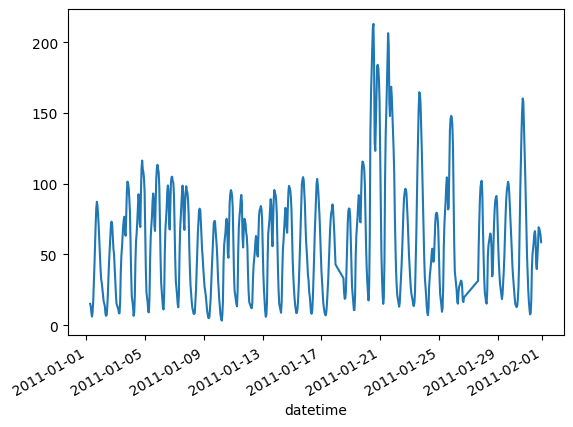

In [36]:
jan_2011_df2['count'].rolling(window=7).mean().plot();

In [37]:
#Unlike in the gapminder datasets the bike dataset has many values in the dataframe. Use pivot_table to create a pivot table of traffic density over weekdays and/or hours. Identify confounding factors in the dataset (e.g. workdays vs weekdays). Create a notebook with your solution.


In [38]:
#df2['weekday'] = df2['count'].index.weekday
#df2['hour'] = df2['count'].index.hour



In [39]:
traffic_density_pivot = pd.pivot_table(df2, 
                                       values='count', 
                                       index='weekday', 
                                       columns='hour', 
                                       aggfunc=np.mean)

In [40]:
traffic_density_pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,52.336538,24.548077,13.288462,7.509804,6.762887,24.451923,96.317308,265.586538,482.942308,262.192308,...,226.153846,244.807692,331.028846,506.307692,436.201923,310.990385,223.653846,174.432692,155.307692,118.990385
Monday,33.514286,17.942308,11.282828,6.422680,6.173469,20.692308,82.769231,238.144231,394.846154,210.576923,...,182.759615,192.355769,267.134615,478.951923,454.586538,328.153846,228.528846,163.576923,110.500000,63.384615
Saturday,97.114286,68.752381,49.447619,23.295238,9.514286,11.815534,25.257143,51.552381,120.238095,189.438095,...,386.561905,392.152381,373.057143,345.600000,299.759615,246.163462,187.778846,160.509615,143.038462,119.105769
Sunday,94.971154,76.096154,58.617647,28.365385,10.617647,12.051020,19.640777,39.800000,87.676190,159.171429,...,369.219048,364.076190,371.447619,332.771429,276.161905,230.000000,176.123810,133.714286,102.780952,67.209524
Thursday,40.757282,18.077670,10.676471,6.775510,6.310000,26.155340,109.194175,310.213592,499.796117,243.631068,...,178.524272,196.834951,287.663462,533.086538,503.432692,364.750000,271.663462,201.788462,149.644231,101.269231
Tuesday,27.732673,13.130000,7.564356,5.184783,5.606061,22.653465,98.480392,274.647059,440.794118,222.892157,...,157.355769,175.201923,270.750000,517.759615,497.605769,337.346154,238.038462,174.730769,126.115385,74.730769
Wednesday,35.509615,16.375000,9.401961,6.040404,5.364583,24.105769,102.692308,287.836538,470.759615,233.269231,...,167.769231,180.846154,264.134615,504.144231,496.737864,358.893204,255.553398,194.097087,144.106796,82.941748


Text(0, 0.5, 'Traffic Density')

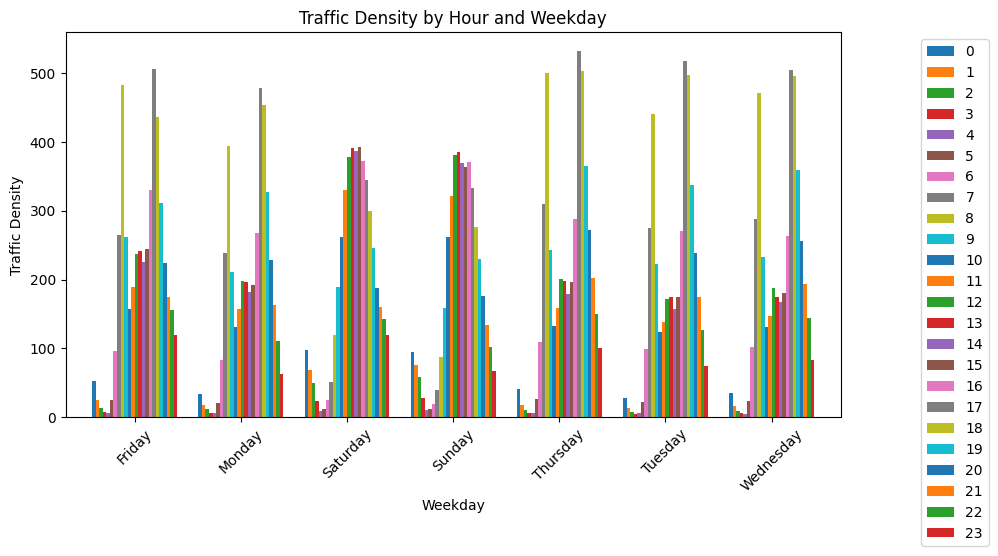

In [41]:
traffic_density_pivot.plot(kind='bar', figsize=(10, 5), width=0.8)
plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.title('Traffic Density by Hour and Weekday')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.ylabel('Traffic Density')


In [42]:
traffic_density_pivot = pd.pivot_table(df2, 
                                       values='count', 
                                       index='hour', 
                                       columns='weekday', 
                                       aggfunc=np.mean)

Text(0, 0.5, 'Traffic Density')

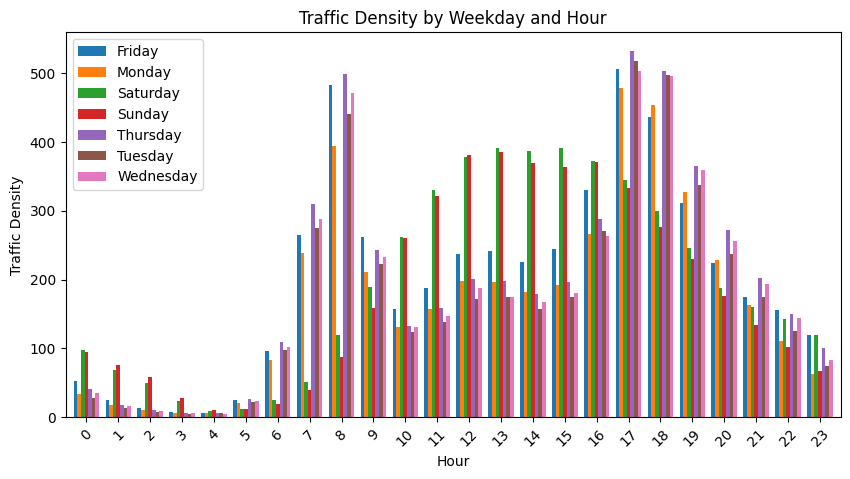

In [43]:
traffic_density_pivot.plot(kind='bar', figsize=(10, 5), width=0.8)
plt.legend(loc='upper left')
plt.title('Traffic Density by Weekday and Hour')
plt.xlabel('Hour')
plt.xticks(rotation=45)
plt.ylabel('Traffic Density')

### Use the count from May 2011 as a forecast for May 2012 and check how far off the predictions are:


In [44]:
may_2011 = df2.loc['2011-05-01':'2011-05-31', 'count']
may_2011.head(30)

datetime
2011-05-01 00:00:00     96
2011-05-01 01:00:00     59
2011-05-01 02:00:00     50
2011-05-01 03:00:00     23
2011-05-01 04:00:00     17
2011-05-01 05:00:00     10
2011-05-01 06:00:00     13
2011-05-01 07:00:00     33
2011-05-01 08:00:00     59
2011-05-01 09:00:00    141
2011-05-01 10:00:00    264
2011-05-01 11:00:00    250
2011-05-01 12:00:00    281
2011-05-01 13:00:00    332
2011-05-01 14:00:00    238
2011-05-01 15:00:00    266
2011-05-01 16:00:00    214
2011-05-01 17:00:00    196
2011-05-01 18:00:00    159
2011-05-01 19:00:00    178
2011-05-01 20:00:00    121
2011-05-01 21:00:00    105
2011-05-01 22:00:00    100
2011-05-01 23:00:00    146
2011-05-02 00:00:00    177
2011-05-02 01:00:00    114
2011-05-02 02:00:00     35
2011-05-02 03:00:00     16
2011-05-02 04:00:00     17
2011-05-02 05:00:00     20
Name: count, dtype: int64

In [45]:
may_2011.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 744 entries, 2011-05-01 00:00:00 to 2011-05-31 23:00:00
Series name: count
Non-Null Count  Dtype
--------------  -----
744 non-null    int64
dtypes: int64(1)
memory usage: 11.6 KB


In [46]:
may_2012 = df2.loc['2012-05-01':'2012-05-31', 'count']


### Use the above results as the input for rmse


In [47]:
may_2011

datetime
2011-05-01 00:00:00     96
2011-05-01 01:00:00     59
2011-05-01 02:00:00     50
2011-05-01 03:00:00     23
2011-05-01 04:00:00     17
                      ... 
2011-05-31 19:00:00    407
2011-05-31 20:00:00    310
2011-05-31 21:00:00    224
2011-05-31 22:00:00    160
2011-05-31 23:00:00     98
Name: count, Length: 744, dtype: int64

In [48]:
may_2012

datetime
2012-05-01 00:00:00     35
2012-05-01 01:00:00     21
2012-05-01 02:00:00      8
2012-05-01 03:00:00      3
2012-05-01 04:00:00      8
                      ... 
2012-05-31 19:00:00    420
2012-05-31 20:00:00    336
2012-05-31 21:00:00    249
2012-05-31 22:00:00    188
2012-05-31 23:00:00    135
Name: count, Length: 744, dtype: int64

In [49]:
sme.rmse(may_2011,may_2012)

168.69935321213757

In [50]:
#Explain

### Subset the dataframe to extract the following columns: temp, atemp, humidity, windspeed and count

In [51]:
subset_df2 = df2[['temp', 'atemp', 'humidity', 'windspeed', 'count']]

In [52]:
subset_df2

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,10.0,14.0,81,0.0000,16
2011-01-01 01:00:00,9.0,14.0,80,0.0000,40
2011-01-01 02:00:00,9.0,14.0,80,0.0000,32
2011-01-01 03:00:00,10.0,14.0,75,0.0000,13
2011-01-01 04:00:00,10.0,14.0,75,0.0000,1
...,...,...,...,...,...
2012-12-31 19:00:00,11.0,13.0,60,11.0014,156
2012-12-31 20:00:00,11.0,13.0,60,11.0014,104
2012-12-31 21:00:00,11.0,13.0,60,11.0014,67


### heatmap


<Axes: >

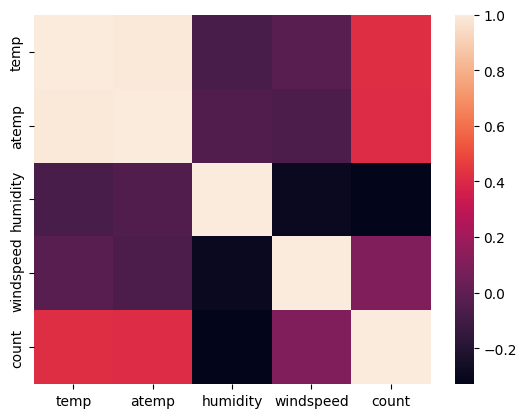

In [53]:
sns.heatmap(subset_df2.corr())

#### according to the heatmap, there are two features which are equally correlated with the column countbut do not fully determine the amount of bikes used.

In [54]:
#Using that feature from step. 4, build a simple linear regression model with count as the response variable. Calculate R2.

In [55]:
first_model = sm.ols(formula='count ~ temp', data=subset_df2).fit()  # instantiate and fit the model

In [56]:
first_model.rsquared

0.1717450910068804

In [57]:
second_model = sm.ols(formula='count ~ temp + atemp', data=subset_df2).fit()  # instantiate and fit the model

In [58]:
second_model.rsquared

0.17191592885608564

In [59]:

third_model = sm.ols(formula='count ~ temp + atemp + windspeed + humidity', data=subset_df2).fit()  # instantiate and fit the model

In [60]:
third_model.rsquared

0.26584768966926864

### According to the information presented, it is estimated that none of the variables used have a distinctive correlation to determine the  count.

In [61]:
#other possible correlations

subset_df3 = df2[['workingday', 'holiday' , 'humidity' , 'year', 'month', 'day','hour', 'season', 'temp', 'atemp', 'weather' ,  'count']]
subset_df3

,workingday,holiday,humidity,year,month,day,hour,season,temp,atemp,weather,count
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,81,2011,1,1,0,1,10.0,14.0,1,16
2011-01-01 01:00:00,0,0,80,2011,1,1,1,1,9.0,14.0,1,40
2011-01-01 02:00:00,0,0,80,2011,1,1,2,1,9.0,14.0,1,32
2011-01-01 03:00:00,0,0,75,2011,1,1,3,1,10.0,14.0,1,13
2011-01-01 04:00:00,0,0,75,2011,1,1,4,1,10.0,14.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,60,2012,12,31,19,1,11.0,13.0,2,156
2012-12-31 20:00:00,1,0,60,2012,12,31,20,1,11.0,13.0,2,104
2012-12-31 21:00:00,1,0,60,2012,12,31,21,1,11.0,13.0,1,67


<Axes: >

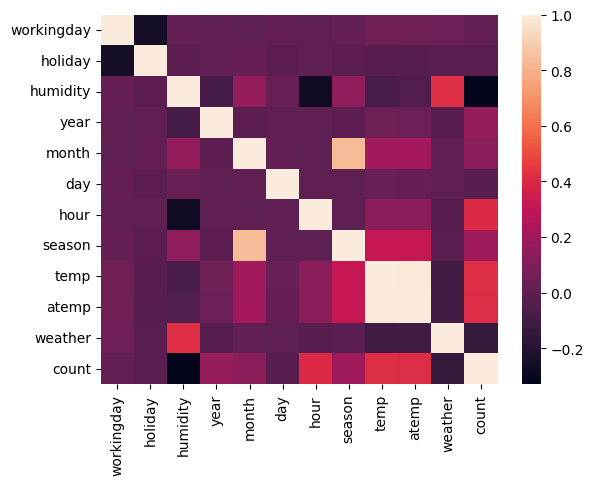

In [62]:
sns.heatmap(subset_df3.corr())

In [63]:
one_model = sm.ols(formula='count ~ hour + season + atemp + temp + year', data=subset_df3).fit()

In [64]:
one_model.rsquared

0.3262734044749245

In [65]:
two_model = sm.ols(formula='count ~ hour + season + year + month', data=subset_df3).fit()

In [66]:
two_model.rsquared

0.23239521600223323

In [67]:
three_model = sm.ols(formula='count ~ hour + season + year + humidity + weather + month + temp + atemp', data=subset_df3).fit()

In [68]:
three_model.rsquared

0.3766110996055818

# Bikes Distribution 

In [69]:
nov_2011_eigth = df2.loc['2011-11-08', 'count']
nov_2011_eigth

datetime
2011-11-08 00:00:00     18
2011-11-08 01:00:00     11
2011-11-08 02:00:00      1
2011-11-08 03:00:00      3
2011-11-08 04:00:00      4
2011-11-08 05:00:00     18
2011-11-08 06:00:00     99
2011-11-08 07:00:00    323
2011-11-08 08:00:00    466
2011-11-08 09:00:00    191
2011-11-08 10:00:00    129
2011-11-08 11:00:00    147
2011-11-08 12:00:00    203
2011-11-08 13:00:00    196
2011-11-08 14:00:00    161
2011-11-08 15:00:00    188
2011-11-08 16:00:00    289
2011-11-08 17:00:00    499
2011-11-08 18:00:00    462
2011-11-08 19:00:00    278
2011-11-08 20:00:00    181
2011-11-08 21:00:00    182
2011-11-08 22:00:00    108
2011-11-08 23:00:00     48
Name: count, dtype: int64

Text(0.5, 9.444444444444438, 'Frequency')

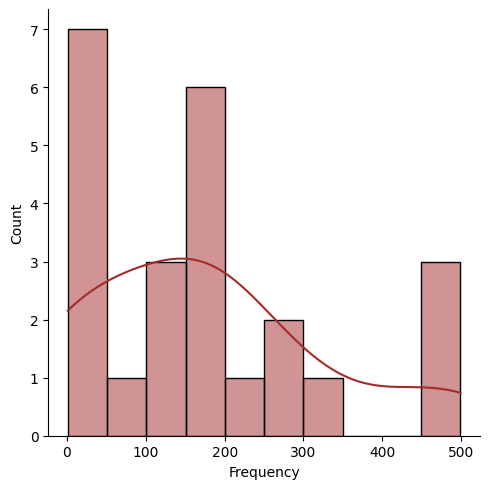

In [70]:
sns.displot(nov_2011_eigth, kde=True,bins=10, color = 'brown')
plt.xlabel('Frequency')

In [71]:
year_2011 = df2[df2['year']==2011]
year_2011

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,10.0,14.0,81,0.0000,3.0,13.0,16,0,Saturday,1,1,2011,morning
2011-01-01 01:00:00,1,0,0,1,9.0,14.0,80,0.0000,8.0,32.0,40,1,Saturday,1,1,2011,morning
2011-01-01 02:00:00,1,0,0,1,9.0,14.0,80,0.0000,5.0,27.0,32,2,Saturday,1,1,2011,morning
2011-01-01 03:00:00,1,0,0,1,10.0,14.0,75,0.0000,3.0,10.0,13,3,Saturday,1,1,2011,morning
2011-01-01 04:00:00,1,0,0,1,10.0,14.0,75,0.0000,0.0,1.0,1,4,Saturday,1,1,2011,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-31 19:00:00,1,0,0,1,17.0,21.0,54,15.0013,--,--,131,19,Saturday,31,12,2011,night
2011-12-31 20:00:00,1,0,0,1,17.0,21.0,54,15.0013,--,--,105,20,Saturday,31,12,2011,night
2011-12-31 21:00:00,1,0,0,1,16.0,20.0,58,12.9980,--,--,91,21,Saturday,31,12,2011,night


In [72]:
year_2011_temp = year_2011['temp']

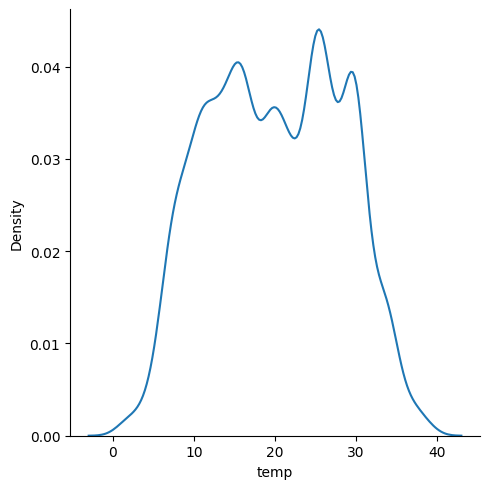

In [73]:
sns.displot(data=year_2011_temp, kind='kde')

## coin flips bonus

In [74]:
import random

In [75]:

num_flips = [10, 100, 1000, 10000]

for flips in num_flips:
    heads = 0
    for _ in range(flips):
        if random.random() < 0.5:
            heads += 1

    estimated_prob = heads / flips
    print(f"Number of flips: {flips}")
    print(f"Estimated probability of getting a head: {estimated_prob}")
    print()



Number of flips: 10
Estimated probability of getting a head: 0.6

Number of flips: 100
Estimated probability of getting a head: 0.56

Number of flips: 1000
Estimated probability of getting a head: 0.5

Number of flips: 10000
Estimated probability of getting a head: 0.5032



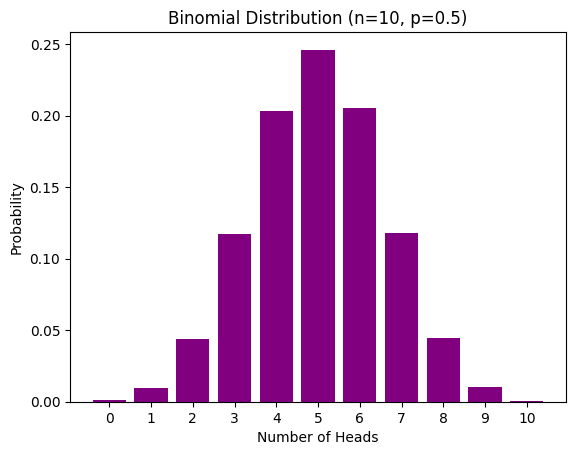

In [76]:
# Plotting the Binomial distribution
samples = 100000
n, p = 10, 0.5
binomial_samples = [sum(random.choices([0, 1], weights=[1 - p, p], k=n)) for _ in range(samples)]
plt.hist(binomial_samples, bins=range(n+2), density=True, align='left', rwidth=0.8, color = 'purple')
plt.xticks(range(n+1))
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.show()

In [77]:
df2_wind = df2['windspeed']
df2_wind

datetime
2011-01-01 00:00:00     0.0000
2011-01-01 01:00:00     0.0000
2011-01-01 02:00:00     0.0000
2011-01-01 03:00:00     0.0000
2011-01-01 04:00:00     0.0000
                        ...   
2012-12-31 19:00:00    11.0014
2012-12-31 20:00:00    11.0014
2012-12-31 21:00:00    11.0014
2012-12-31 22:00:00     8.9981
2012-12-31 23:00:00     8.9981
Name: windspeed, Length: 17379, dtype: float64

In [78]:
sample_means = []

for i in range(10_000):
    bootstrap_sample = df2_wind.sample(n=100, replace=True)
    sample_means.append(bootstrap_sample.mean())
    

In [79]:
sample_means

[13.080008000000003,
 12.780652000000002,
 12.250212999999999,
 12.599952999999998,
 12.630371000000002,
 13.550348000000001,
 13.95007,
 11.450232999999999,
 12.530272999999998,
 12.620120000000002,
 12.56049,
 13.590481000000002,
 11.920506,
 12.230515,
 13.730511000000002,
 13.290388,
 12.740384999999998,
 12.820115000000003,
 11.890624000000003,
 12.450275000000001,
 13.040277000000001,
 14.200315,
 11.760041000000003,
 11.290706,
 13.410452000000003,
 11.900472999999998,
 12.620454999999998,
 12.609936,
 13.590280000000002,
 12.000504000000001,
 13.870407000000002,
 13.360135,
 11.970287000000003,
 12.180332,
 10.900163000000003,
 12.580322000000002,
 13.660362000000003,
 13.090124999999999,
 12.300463000000004,
 12.830500000000002,
 13.560130000000001,
 13.430083,
 13.950137000000002,
 13.070292999999998,
 12.480358000000003,
 13.600262999999998,
 12.520624999999997,
 13.450384000000001,
 13.020378000000001,
 11.650563,
 14.760234,
 12.180398999999996,
 12.770534999999997,
 13.61

In [80]:
alpha = 0.95

lower_quantile = (1-alpha)/2  

upper_quantile = alpha + ((1-alpha)/2)

print(alpha, lower_quantile, upper_quantile)

0.95 0.025000000000000022 0.975


In [81]:
sample_means_series = pd.Series(sample_means)

# pd.quantile() method will return the quantile values

lower_limit = sample_means_series.quantile(lower_quantile)

upper_limit = sample_means_series.quantile(upper_quantile)

print(f'The Confidence Interval of the average windspeed is between {lower_limit} and {upper_limit}')

The Confidence Interval of the average windspeed is between 11.130442000000002 and 14.360312675000001


# z-value

In [82]:
sample_mean = df2_wind.mean()
sample_std = df2_wind.std()
print(sample_mean, sample_std)

12.736539622532941 8.196795314376963


In [83]:
# alpha = 0.95, then z = 1.96

z = 1.96
n = 100 #len(df2_wind)

lower_limit_eq = sample_mean - ((z*sample_std)/np.sqrt(n))
upper_limit_eq = sample_mean + ((z*sample_std)/np.sqrt(n))

print(f'Calculated Confidence Interval of the average windspeed is between {lower_limit_eq} and {upper_limit_eq}')


Calculated Confidence Interval of the average windspeed is between 11.129967740915056 and 14.343111504150826


In [84]:
#sns.pairplot(year_2011, hue='season')

## A/B Testing

In [85]:
# perfom a hypothesis testing that checks if there is a significant difference between two of the temperature columns: temp and atemp. 

In [86]:
df2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,10.0,14.0,81,0.0,3.0,13.0,16,0,Saturday,1,1,2011,morning
2011-01-01 01:00:00,1,0,0,1,9.0,14.0,80,0.0,8.0,32.0,40,1,Saturday,1,1,2011,morning
2011-01-01 02:00:00,1,0,0,1,9.0,14.0,80,0.0,5.0,27.0,32,2,Saturday,1,1,2011,morning
2011-01-01 03:00:00,1,0,0,1,10.0,14.0,75,0.0,3.0,10.0,13,3,Saturday,1,1,2011,morning
2011-01-01 04:00:00,1,0,0,1,10.0,14.0,75,0.0,0.0,1.0,1,4,Saturday,1,1,2011,morning


In [87]:
temp = df2['temp']
atemp = df2 ['atemp']

In [88]:
t_statistic, p_value = sps.ttest_ind(temp, atemp)
alpha = 0.05

In [89]:
t_statistic, p_value

(-38.690518720654985, 0.0)

In [90]:
if p_value < alpha:
    print("There is a significant difference between 'temp' and 'atemp'.")
else:
    print("There is no significant difference between 'temp' and 'atemp'.")


There is a significant difference between 'temp' and 'atemp'.


# Now I am presenting what I learned and liked the most:

In [91]:
year_2011 = df2[df2['year']==2011]
year_2011

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,10.0,14.0,81,0.0000,3.0,13.0,16,0,Saturday,1,1,2011,morning
2011-01-01 01:00:00,1,0,0,1,9.0,14.0,80,0.0000,8.0,32.0,40,1,Saturday,1,1,2011,morning
2011-01-01 02:00:00,1,0,0,1,9.0,14.0,80,0.0000,5.0,27.0,32,2,Saturday,1,1,2011,morning
2011-01-01 03:00:00,1,0,0,1,10.0,14.0,75,0.0000,3.0,10.0,13,3,Saturday,1,1,2011,morning
2011-01-01 04:00:00,1,0,0,1,10.0,14.0,75,0.0000,0.0,1.0,1,4,Saturday,1,1,2011,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-31 19:00:00,1,0,0,1,17.0,21.0,54,15.0013,--,--,131,19,Saturday,31,12,2011,night
2011-12-31 20:00:00,1,0,0,1,17.0,21.0,54,15.0013,--,--,105,20,Saturday,31,12,2011,night
2011-12-31 21:00:00,1,0,0,1,16.0,20.0,58,12.9980,--,--,91,21,Saturday,31,12,2011,night


In [92]:
bike_num_pivot_2011 = pd.pivot_table(year_2011, 
                                       values='count', 
                                       index='part_of_day', 
                                       columns='season', 
                                       aggfunc=np.mean)

In [93]:
bike_num_pivot_2011

season,1,2,3,4
part_of_day,,,,
morning,13.636201,28.519562,38.753086,30.254428
afternoon,106.742911,207.664855,242.732270,221.893258
evening,134.667910,296.112319,338.712256,298.632959
night,67.044944,173.869565,227.436559,157.582022


In [94]:
year_2012 = df2[df2['year']==2012]

bike_num_pivot_2012 = pd.pivot_table(year_2012, 
                                       values='count', 
                                       index='part_of_day', 
                                       columns='season', 
                                       aggfunc=np.mean)


Text(0, 0.5, 'Count')

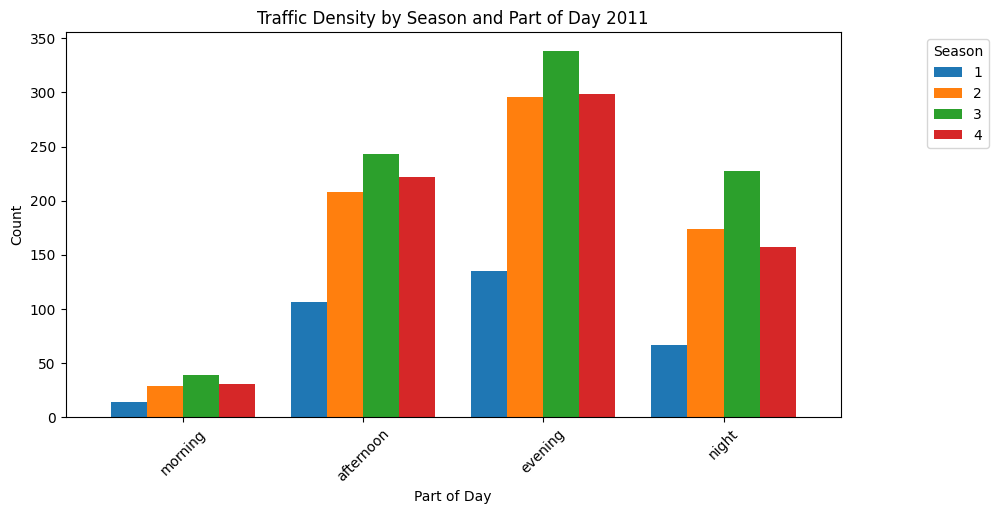

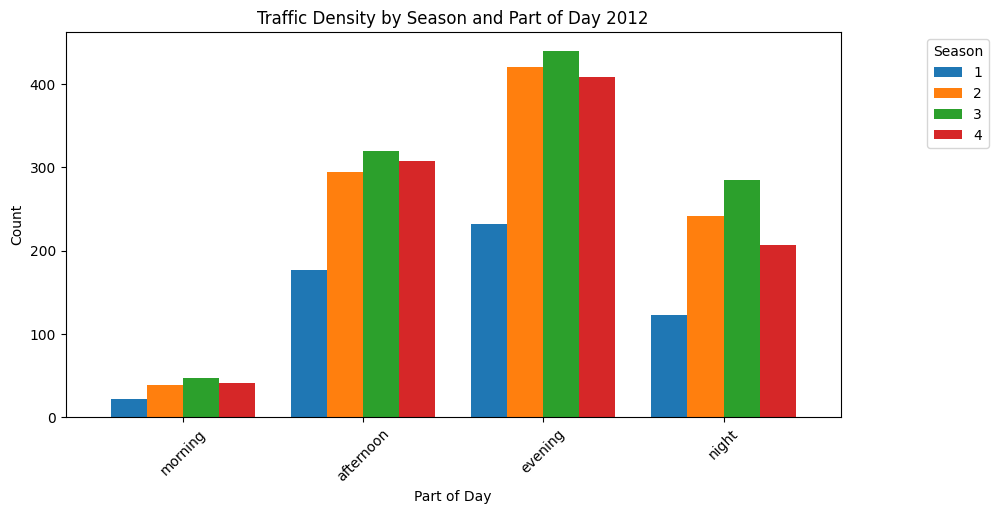

In [95]:
bike_num_pivot_2011.plot(kind='bar', figsize=(10, 5), width=0.8)
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Season')
plt.title('Traffic Density by Season and Part of Day 2011')
plt.xlabel('Part of Day')
plt.xticks(rotation=45)
plt.ylabel('Count')

bike_num_pivot_2012.plot(kind='bar', figsize=(10, 5), width=0.8)
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Season')
plt.title('Traffic Density by Season and Part of Day 2012')
plt.xlabel('Part of Day')
plt.xticks(rotation=45)
plt.ylabel('Count')

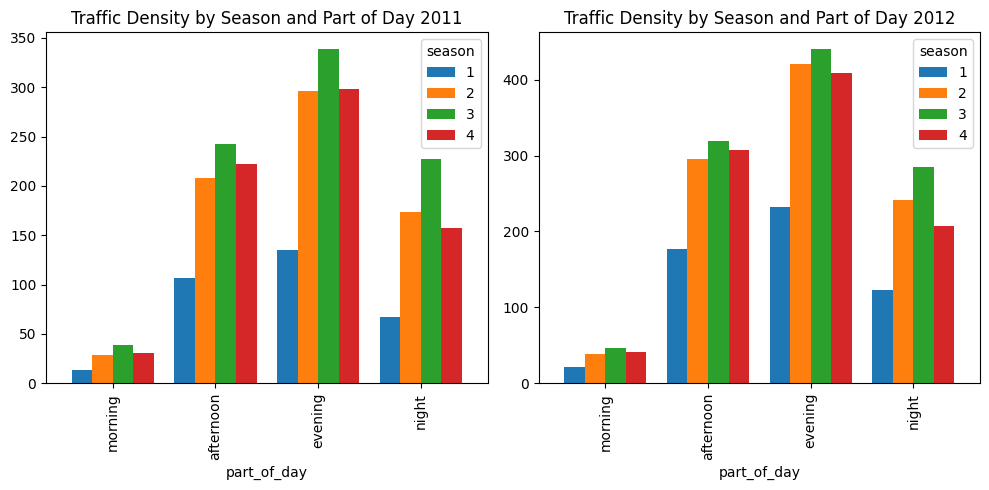

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first Seaborn plot on the first subplot
bike_num_pivot_2011.plot(kind='bar', figsize=(10, 5), width=0.8, ax=axes[0])
axes[0].set_title('Traffic Density by Season and Part of Day 2011')

# Plot the second Seaborn plot on the second subplot
bike_num_pivot_2012.plot(kind='bar', figsize=(10, 5), width=0.8, ax=axes[1])
axes[1].set_title('Traffic Density by Season and Part of Day 2012')

# Adjust the layout of subplots
plt.tight_layout()

# Show the merged plot
plt.show()


In [97]:
year_2011_spring = df2[df2['season']== 2]

In [98]:
year_2011_summer = df2[df2['season']== 3]

In [99]:
year_2011_fall = df2[df2['season']== 4]

In [100]:
spring_bikes_ave = year_2011_spring.groupby('weather')['count'].mean()
spring_bikes_ave

weather
1    229.899265
2    179.195804
3    111.859606
Name: count, dtype: float64

In [101]:
summer_bikes_ave = year_2011_summer.groupby('weather')['count'].mean()
summer_bikes_ave

weather
1    243.073476
2    222.963041
3    161.189591
Name: count, dtype: float64

In [102]:
fall_bikes_ave = year_2011_fall.groupby('weather')['count'].mean()
fall_bikes_ave

weather
1    213.202376
2    205.221154
3    125.917333
Name: count, dtype: float64

In [103]:
new_year_2011 = year_2011[year_2011['season'] != 1]
new_year_2012 = year_2012[year_2012['season'] != 1]

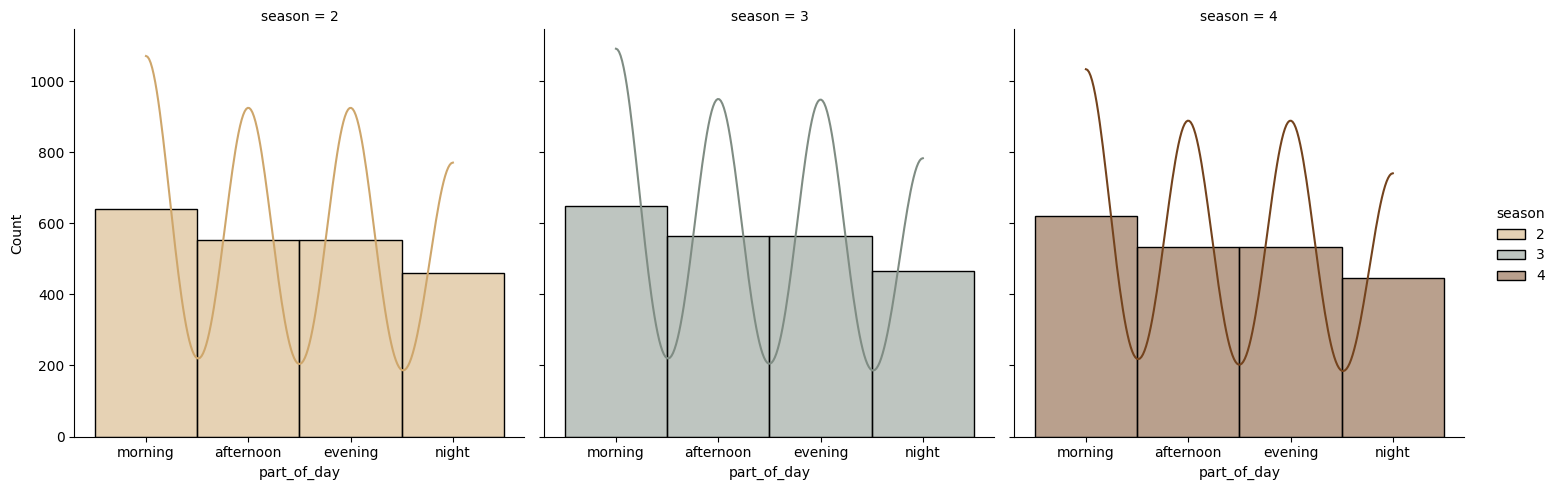

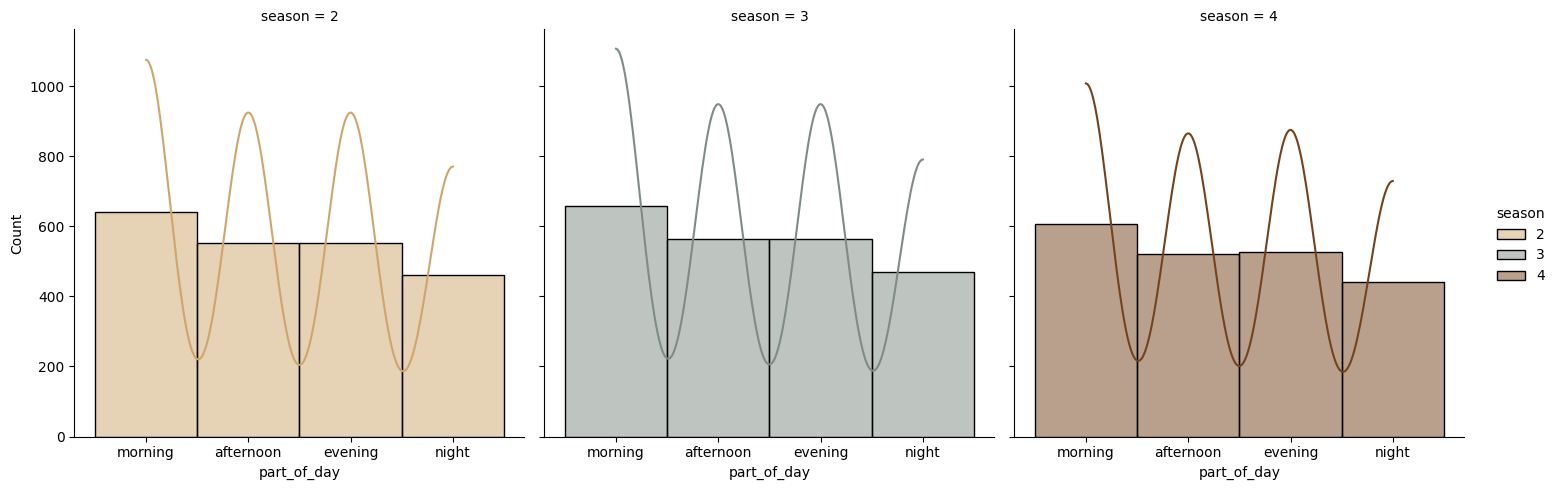

In [104]:
custom_palette = ["#CEA66B", "#7F8C83", "#74431D"]
sns.displot(data=new_year_2011, x= 'part_of_day', col='season', hue = 'season', kde=True, palette = custom_palette)
sns.displot(data=new_year_2012, x= 'part_of_day', col='season', hue = 'season', kde=True, palette = custom_palette)

In [105]:
sns.pairplot(new_year_2011, hue='part_of_day');

In [ ]:
df2_new = df2[df2['season'] == 3]


In [ ]:
df2_new.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,,,
2011-06-21 00:00:00,3,0,1,1,25.0,30.0,78,11.0014,--,--,46,0,Tuesday,21,6,2011,morning
2011-06-21 01:00:00,3,0,1,3,25.0,30.0,78,11.0014,--,--,21,1,Tuesday,21,6,2011,morning
2011-06-21 02:00:00,3,0,1,3,25.0,29.0,83,11.0014,--,--,13,2,Tuesday,21,6,2011,morning
2011-06-21 03:00:00,3,0,1,3,25.0,29.0,83,11.0014,--,--,9,3,Tuesday,21,6,2011,morning
2011-06-21 04:00:00,3,0,1,2,25.0,27.0,88,7.0015,--,--,9,4,Tuesday,21,6,2011,morning


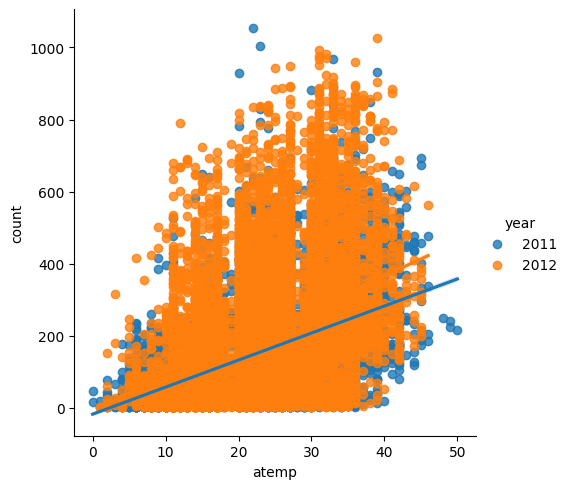

In [108]:
sns.lmplot(data=df2, x='atemp', y='count', hue='year');

In [109]:
year_2011_summer_bike = year_2011_summer['atemp']

In [110]:
sample_means_list = [] 


for i in range(10_000):
    bootstrap_sample = year_2011_summer_bike.sample(frac=1, replace=True)
    
    sample_means_list.append(bootstrap_sample.mean())
       

In [111]:
clvl = 0.95

lower_quantile = (1-clvl)/2  

upper_quantile = clvl + ((1-clvl)/2)

print(clvl, lower_quantile, upper_quantile)

0.95 0.025000000000000022 0.975


In [112]:
sample_means_series = pd.Series(sample_means_list)

# pd.quantile() method will return the quantile values

lower_limit = sample_means_series.quantile(lower_quantile)
upper_limit = sample_means_series.quantile(upper_quantile)

print(f'The Confidence Interval of the average bill_length of Adelie is between {lower_limit} and {upper_limit}')

The Confidence Interval of the average bill_length of Adelie is between 32.69483429715302 and 32.9546318950178


In [113]:
sample_mean = year_2011_summer_bike.mean()
sample_std = year_2011_summer_bike.std()

print(sample_mean, sample_std)

32.825845195729535 4.457452715816385


In [114]:
z = 1.96
n = len(year_2011_summer_bike)

lower_limit_eq = sample_mean - ((z*sample_std)/np.sqrt(n))
upper_limit_eq = sample_mean + ((z*sample_std)/np.sqrt(n))

print(f'Calculated Confidence Interval of the average summer bike use regarding thermal sensation is between {lower_limit_eq} and {upper_limit_eq}')


Calculated Confidence Interval of the average summer bike use regarding thermal sensation is between 32.69554962126457 and 32.9561407701945


In [115]:
print(f'Bootstrapped Confidence Interval  of the summer bike use regarding thermal sensation is between {lower_limit} and {upper_limit}')


Bootstrapped Confidence Interval  of the summer bike use regarding thermal sensation is between 32.69483429715302 and 32.9546318950178


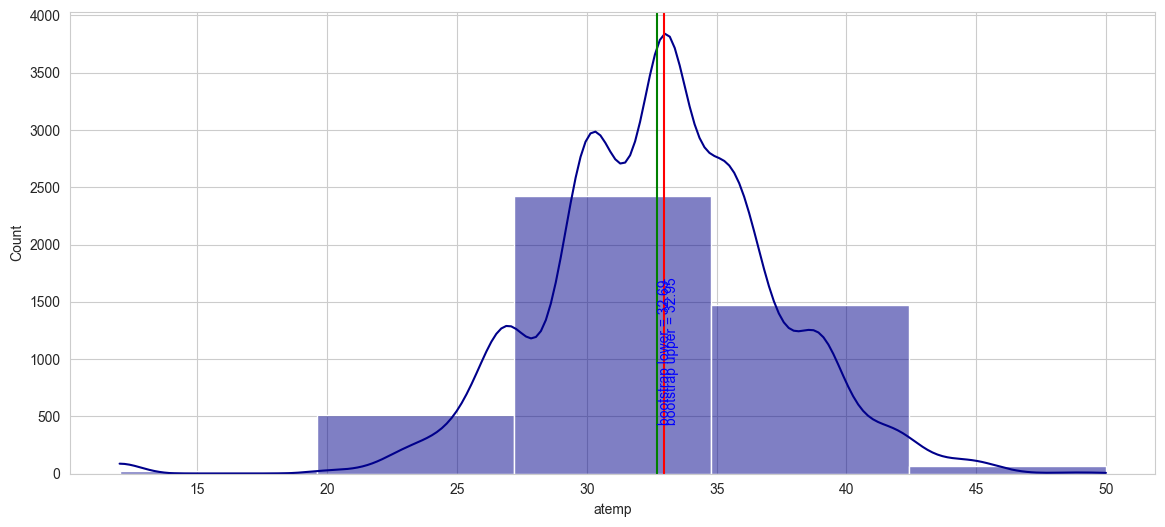

In [116]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

sns.histplot( year_2011_summer_bike, kde=True, bins=5, color = 'darkblue')

plt.axvline(lower_limit, color='g')
plt.axvline(upper_limit, color='r')

plt.text(lower_limit+0.05, 450, f'bootstrap lower = {lower_limit.round(2)}', color='b', rotation = 90)
plt.text(upper_limit+0.05, 450, f'bootstrap upper = {upper_limit.round(2)}', color='b', rotation = 90);

#plt.axvline(lower_limit_eq, color='g')
#plt.axvline(upper_limit_eq, color='r')
#
#plt.text(lower_limit_eq-0.06, 450, f'equation lower = {lower_limit_eq.round(2)}', color='b', rotation = 90)
#plt.text(upper_limit_eq-0.06, 450, f'equation upper = {upper_limit_eq.round(2)}', color='b', rotation = 90);



In [117]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.express as px

In [118]:
df2_num = df2[['atemp', 'temp','season', 'hour']]

df2_num.head()

,atemp,temp,season,hour
datetime,,,,
2011-01-01 00:00:00,14.0,10.0,1,0
2011-01-01 01:00:00,14.0,9.0,1,1
2011-01-01 02:00:00,14.0,9.0,1,2
2011-01-01 03:00:00,14.0,10.0,1,3
2011-01-01 04:00:00,14.0,10.0,1,4


In [119]:
scaler = StandardScaler()

In [120]:
bikes_scaled = scaler.fit_transform(df2_num)
bikes_scaled

array([[-1.13693108, -1.30986576, -1.3566343 , -1.67000398],
       [-1.13693108, -1.43632206, -1.3566343 , -1.52537422],
       [-1.13693108, -1.43632206, -1.3566343 , -1.38074446],
       ...,
       [-1.25306938, -1.18340946, -1.3566343 ,  1.36722104],
       [-1.13693108, -1.18340946, -1.3566343 ,  1.51185081],
       [-1.13693108, -1.18340946, -1.3566343 ,  1.65648057]])

In [121]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [122]:
kmeans.fit(df_scaled_penguins)

NameError: name 'df_scaled_penguins' is not defined